In [6]:

fieldDict = dict.fromkeys([0, 1, 2, 3, 11, 12, 13, 14])
fieldDict[0] = {'bmi': (862, 864), 'weight': (832, 841)}
fieldDict[1] = {'bmi': (725, 730), 'weight': (686, 695)}
fieldDict[2] = {'bmi': (933, 936), 'weight': (822, 831)}
fieldDict[3] = {'bmi': (854, 857), 'weight': (745, 754)}
fieldDict[11] = {'bmi': (1533, 1536), 'weight': (1475, 1484)}
fieldDict[12] = {'bmi': (1644, 1647), 'weight': (1449, 1458)}
fieldDict[13] = {'bmi': (2192, 2195), 'weight': (1953, 1962)}
fieldDict[14] = {'bmi': (2247, 2250), 'weight': (2007, 2016)}


In [10]:
import os
for year in fieldDict:
    print(year, fieldDict[year])





0 {'bmi': (862, 864), 'weight': (832, 841)}
1 {'bmi': (725, 730), 'weight': (686, 695)}
2 {'bmi': (933, 936), 'weight': (822, 831)}
3 {'bmi': (854, 857), 'weight': (745, 754)}
11 {'bmi': (1533, 1536), 'weight': (1475, 1484)}
12 {'bmi': (1644, 1647), 'weight': (1449, 1458)}
13 {'bmi': (2192, 2195), 'weight': (1953, 1962)}
14 {'bmi': (2247, 2250), 'weight': (2007, 2016)}


In [8]:
 def convertBMI(bmiString, shortYear):
    bmi = 0
    if shortYear == 0 and bmiString != '999':
        bmi = .1 * float(bmiString)
    elif shortYear == 1 and bmiString != '999999':
        bmi = .0001 * float(bmiString)
    elif 2 <= shortYear <= 10 and bmiString != '9999':
        bmi = .01 * float(bmiString)
    elif shortYear > 10 and bmiString != '    ':
        bmi = .01 * float(bmiString)
    return bmi

In [11]:
path = r'/Users/amin/Desktop/data science/exercise 3.6/data'
filelist = os.listdir(path)

intervals = [(10+i, 10+(i+1)) for i in range(65)]
years = [2000, 2001, 2002, 2003, 2011, 2012, 2013, 2014]
histDict = {}

n = 0
outCounter = 0

for year in years:
    histDict[year] = dict.fromkeys(intervals,0)


for filename in filelist:
        shortYear = int(filename[6:8])
        year = 2000 + shortYear

        fields = fieldDict[shortYear]
        sWt, eWt = fields['weight']
        sBmi, eBmi = fields['bmi']
        histogram = histDict[year]

        file = path + '/' + filename
        print(file, year, sWt, eWt, sBmi, eBmi)

        with open(file, 'r', encoding='latin-1') as f:
            for record in f:
                weight = float(record[sWt-1:eWt])
                bmiString = record[sBmi-1:eBmi]
                bmi = convertBMI(bmiString, shortYear)

                for interval in histogram:
                    if interval[0] < bmi <= interval[1]:
                        histogram[interval] += weight
                        break
                
                n += 1
                outCounter += int(bmi < 10 or bmi > 75)
                if n % 10000 == 0:
                    print(year,n,outCounter)

/Users/amin/Desktop/data science/exercise 3.6/data/LLCP2001.ASC 2001 686 695 725 730
2001 10000 453
2001 20000 862
2001 30000 1427
2001 40000 1989
2001 50000 2385
2001 60000 2829
2001 70000 3413
2001 80000 3956
2001 90000 4480
2001 100000 5007
2001 110000 5460
2001 120000 5957
2001 130000 6540
2001 140000 7059
2001 150000 7590
2001 160000 8103
2001 170000 8626
2001 180000 9147
2001 190000 9532
2001 200000 9992
2001 210000 10318
/Users/amin/Desktop/data science/exercise 3.6/data/LLCP2000.ASC 2000 832 841 862 864
2000 220000 10731
2000 230000 11095
2000 240000 11583
2000 250000 11987
2000 260000 12330
2000 270000 12785
2000 280000 13260
2000 290000 13706
2000 300000 14181
2000 310000 14628
2000 320000 15118
2000 330000 15572
2000 340000 16101
2000 350000 16592
2000 360000 17033
2000 370000 17525
2000 380000 17955
2000 390000 18409
/Users/amin/Desktop/data science/exercise 3.6/data/LLCP2002.ASC 2002 822 831 933 936
2002 400000 18805
2002 410000 19159
2002 420000 19563
2002 430000 20147
20

In [12]:
decadeWts = [0]*2
decades = [0, 1]
decadeDict = {}
for decade in decades:
    decadeDict[decade] = dict.fromkeys(intervals,0)

In [13]:
for year in years:
    decade = int(year/2005)
    histogram = histDict[year]
    for interval in histogram:
        weightSum = histogram[interval]
        decadeDict[decade][interval] += weightSum
        decadeWts[decade] += weightSum

In [14]:
for decade in decadeDict:
    histogram = decadeDict[decade]
    for interval in histogram:
        histogram[interval] = histogram[interval]/decadeWts[decade]

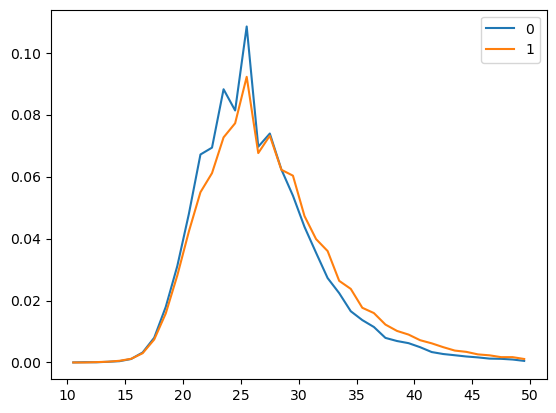

In [15]:
import matplotlib.pyplot as plt
import numpy as np

x = [np.mean(pair) for pair in intervals if pair[0] < 50]
y = [decadeDict[0][pair] for pair in intervals if pair[0] < 50]
plt.plot(x, y)
y = [decadeDict[1][pair] for pair in intervals if pair[0] < 50]
plt.plot(x, y)
plt.legend([str(label) for label in range(2)], loc='upper right')

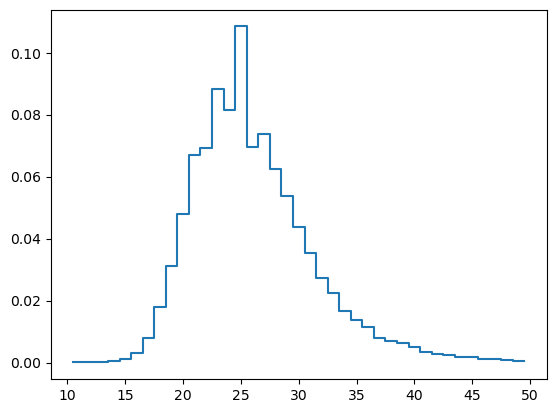

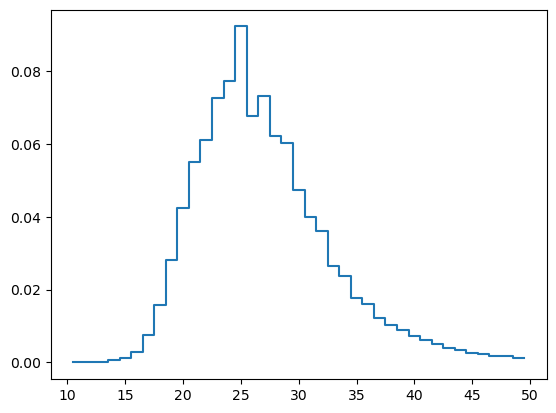

In [16]:
x = [np.mean(pair) for pair in intervals if pair[0] < 50]
y = [decadeDict[0][pair] for pair in intervals if pair[0] < 50]
plt.figure(1)
plt.plot(x, y, drawstyle='steps')
y = [decadeDict[1][pair] for pair in intervals if pair[0] < 50]
plt.figure(2)
plt.plot(x, y, drawstyle='steps')

In [20]:
y = sum([decadeDict[0][(a,b)] for a, b in decadeDict[0] if a >= 30])
x = sum([decadeDict[1][(a,b)] for a, b in decadeDict[1] if a >= 30])
print(y, x)

difference = 100 * (x - y)/y
print(difference)


0.2155974489290573 0.27978851412842165
29.77357362910473
